# Arhat Shah Assignment 5

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
# import the data into a dataframe
aviation_df = pd.read_csv('aviation_data.csv', delimiter='|')

# Remove leading and trailing white spaces from the selected columns
aviation_df = aviation_df.rename(columns=lambda x : x.strip())

#extract the following columns: 
aviation_df = aviation_df[['Broad Phase of Flight', 'Total Uninjured', 'Total Minor Injuries', 'Total Serious Injuries', 
                           'Total Fatal Injuries', 'Air Carrier', 'Make', 'Model', 'Aircraft Category', 'Aircraft Damage', 
                           'Injury Severity', 'Country', 'Event Date', 'Investigation Type', 'Event Id']]


# convert their data to suitable data types 
aviation_df['Event Date'] = pd.to_datetime(aviation_df['Event Date'])
aviation_df['Aircraft Category'] = aviation_df['Aircraft Category'].astype('string')
aviation_df['Investigation Type'] = aviation_df['Investigation Type'].astype('string')
aviation_df['Injury Severity'] = aviation_df['Injury Severity'].astype('string')
aviation_df['Country'] = aviation_df['Country'].astype('string')
aviation_df['Broad Phase of Flight'] = aviation_df['Broad Phase of Flight'].astype('string')
aviation_df['Air Carrier'] = aviation_df['Air Carrier'].astype('string')
aviation_df['Make'] = aviation_df['Make'].astype('string')
aviation_df['Aircraft Damage'] = aviation_df['Aircraft Damage'].astype('string')
aviation_df['Model'] = aviation_df['Model'].astype('string')

# convert all the string columns to upper case
aviation_df = aviation_df.apply(lambda x: x.str.upper() if x.dtype == "string" else x)

# Remove all null values 
aviation_df = aviation_df.dropna()

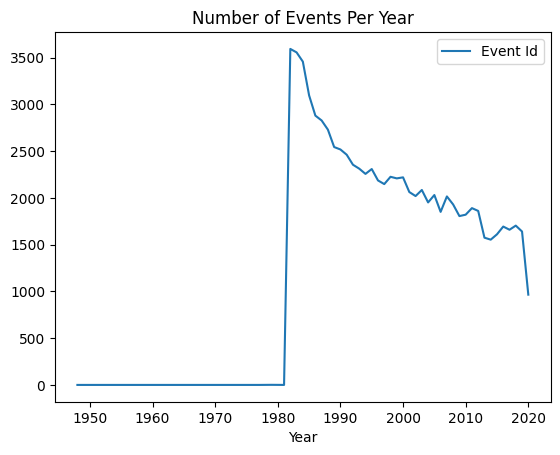

The year with the highest number of events is 1982


In [8]:
# Get year from Date 
aviation_df['Year'] = aviation_df['Event Date'].dt.year

# count number of events each year
events_each_year = aviation_df.groupby(['Year'], as_index=False)['Event Id'].count()

# Plot a line chart
events_each_year.plot(x='Year', y='Event Id')
plt.title('Number of Events Per Year')

# display the plot
plt.show()

# the year with the most amount of events 
year = events_each_year.loc[events_each_year['Event Id'].idxmax(), 'Year']
print("The year with the highest number of events is", year)

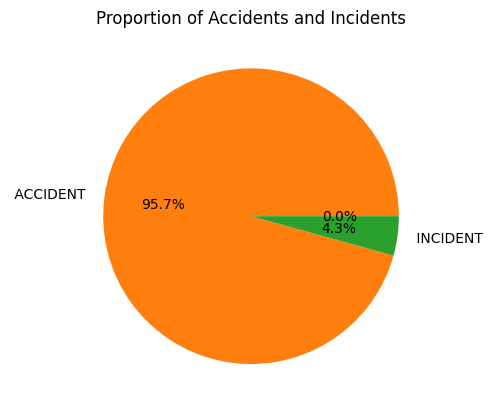

In [9]:
# determine the proportion of accidents and incidents
investigation_type = aviation_df.groupby(['Investigation Type'], as_index=False)['Event Id'].count()

# make a pie chart
plt.pie(investigation_type['Event Id'], labels=investigation_type['Investigation Type'], autopct='%1.1f%%')

# add title
plt.title('Proportion of Accidents and Incidents')

# display plot
plt.show()

the pie chart shows the proportion of Accidents and Incidents in the dataset. We can see that 95.7% of the total events are accidents, and 4.3% are incidents. 

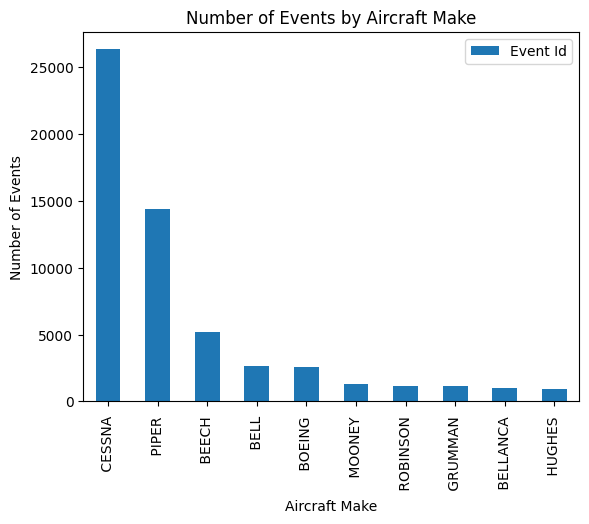

In [10]:
# count the number of events for each make
make_count = aviation_df.groupby(['Make'], as_index=False)['Event Id'].count()
make_count = make_count.sort_values('Event Id', ascending=False)

make_count = make_count.head(10)

# plot a bar chart
make_count.plot(x='Make', y='Event Id', kind='bar')
plt.title('Number of Events by Aircraft Make')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Events')
plt.show()

We can use a bar chart to visualize the top 10 arcrafts with the most events occuring, and we can see that Cessna has the most events and Piper is the second most common, while Hughes is the least common. 

/var/folders/3g/5621nrr977jfl9g59ldrc6440000gn/T/ipykernel_51494/2254180514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boeing_737_accidents['Year'] = boeing_737_accidents['Event Date'].dt.year


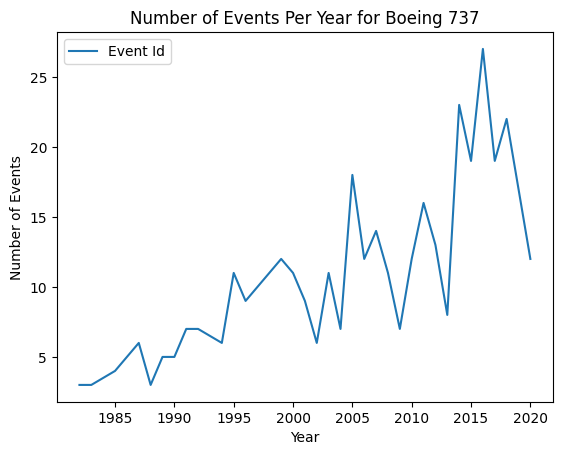

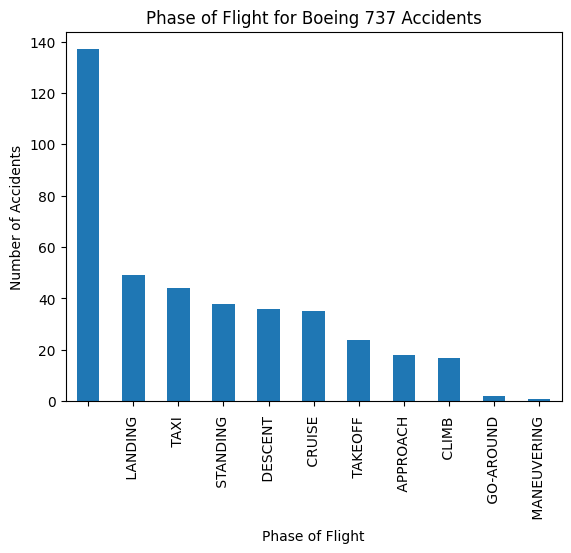

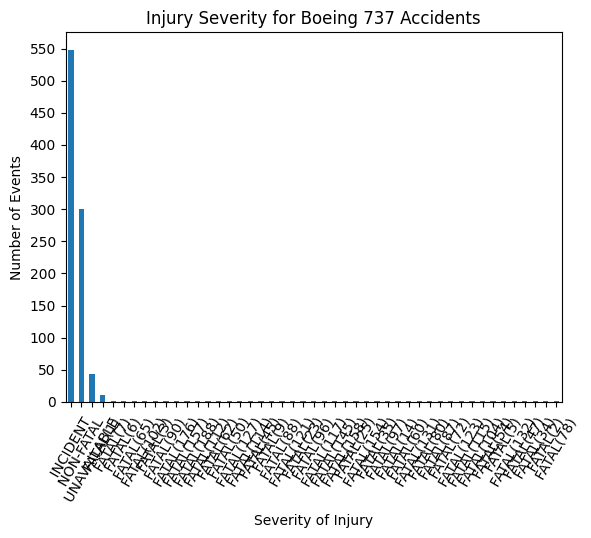

In [37]:
# count the number of events for the Boeing 737
boeing_737 = aviation_df[aviation_df['Make'].str.contains('BOEING') & aviation_df['Model'].str.contains('737')]


# What year had the most accidents
boeing_737_accidents = boeing_737.loc[boeing_737['Investigation Type'].str.contains('ACCIDENT')]
boeing_737_accidents['Year'] = boeing_737_accidents['Event Date'].dt.year
events_per_year = boeing_737_accidents.groupby(['Year'], as_index=False)['Event Id'].count()

# make plot
events_per_year.plot(x='Year', y='Event Id')
plt.title('Number of Events Per Year for Boeing 737')
plt.ylabel('Number of Events')
plt.show()


# What Phase of Flight did most accidents transpire
boeing_737_accidents['Broad Phase of Flight'].value_counts().plot(kind='bar')

plt.title('Phase of Flight for Boeing 737 Accidents')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.show()



# Using the Injury Severity variable, determine if most events were fatal or non-fatal
boeing_737['Injury Severity'].value_counts().plot(kind='bar')
plt.title('Injury Severity for Boeing 737 Accidents')
#rotate the x-axis labels
plt.xticks(rotation=60)
plt.xlabel('Severity of Injury')
plt.ylabel('Number of Events')
#add more ticks to the y-axis
plt.yticks(range(0, 600, 50))
plt.show()

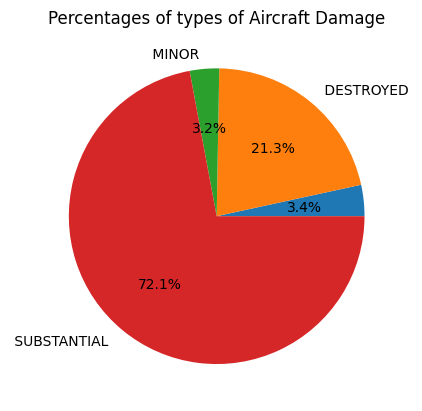

In [36]:
#bonus
aircraft_damage_type = aviation_df.groupby(['Aircraft Damage'], as_index=False)['Event Id'].count()
plt.pie(aircraft_damage_type['Event Id'], labels=aircraft_damage_type['Aircraft Damage'], autopct='%1.1f%%')
plt.title('Percentages of types of Aircraft Damage')
plt.show()
